# BDA PROJECT
* Title -  Student Depression Analysis – Exploratory Data Analysis (EDA)
* Name - Aastha Sinha
* Enroll -12023002001041
* Course - B.Tech. CSE


# **IMPORTING REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
import warnings
warnings.filterwarnings('ignore')

# **DATA PROCESSING**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Student Depression Dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [5]:
df = df.dropna()

In [7]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [9]:
sleep_mapping = {
    "Less than 5 hours": 4,
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "More than 8 hours": 9

df['Sleep Duration Numeric'] = df['Sleep Duration'].map(sleep_mapping)
df['Sleep Duration Numeric'] = df['Sleep Duration Numeric'].fillna(df['Sleep Duration Numeric'].mean())
df[['Sleep Duration', 'Sleep Duration Numeric']].head()


,Sleep Duration,Sleep Duration Numeric
0,5-6 hours,5.5
1,5-6 hours,5.5
2,Less than 5 hours,4.0
3,7-8 hours,7.5
4,5-6 hours,5.5


In [11]:
df.duplicated().sum()
df = df.drop_duplicates()

In [12]:
df.dtypes

,0
id,int64
Gender,object
Age,float64
City,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64
Study Satisfaction,float64
Job Satisfaction,float64


In [14]:
# Strip extra spaces, lowercase entries, fix typos etc.
df['Gender'] = df['Gender'].str.strip().str.lower()
df['Degree'] = df['Degree'].str.strip().str.title()

In [16]:
df['Gender'].unique()
df['Degree'].unique()

array(['B.Pharm', 'Bsc', 'Ba', 'Bca', 'M.Tech', 'Phd', 'Class 12', 'B.Ed',
       'Llb', 'Be', 'M.Ed', 'Msc', 'Bhm', 'M.Pharm', 'Mca', 'Ma', 'B.Com',
       'Md', 'Mba', 'Mbbs', 'M.Com', 'B.Arch', 'Llm', 'B.Tech', 'Bba',
       'Me', 'Mhm', 'Others'], dtype=object)

In [17]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [18]:
df_encoded.head()
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Columns: 112 entries, id to Family History of Mental Illness_Yes
dtypes: bool(101), float64(9), int64(2)
memory usage: 5.2 MB


### **From the Data**

- **Numeric Features**:
  - `Id`, `Age`, `Academic Pressure`, `Work Pressure`, `CGPA`, `Study Satisfaction`, `Job Satisfaction`, `Work/Study Hours`, `Financial Stress`,`Sleep Duration Numeric`, `Depression`.  

- **Categorical Features**:  
  - `Gender`, `City`, `Profession`, `Sleep Duration`, `Dietary Habits`, `Degree`, `Have you ever had suicidal thoughts ?`, `Family History of Mental Illness`.  

---

## **MINOR OBJECTIVES**

1. How is depression level distributed across different demographics (age, gender, Degree)?

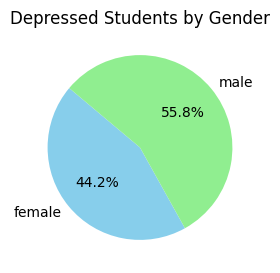

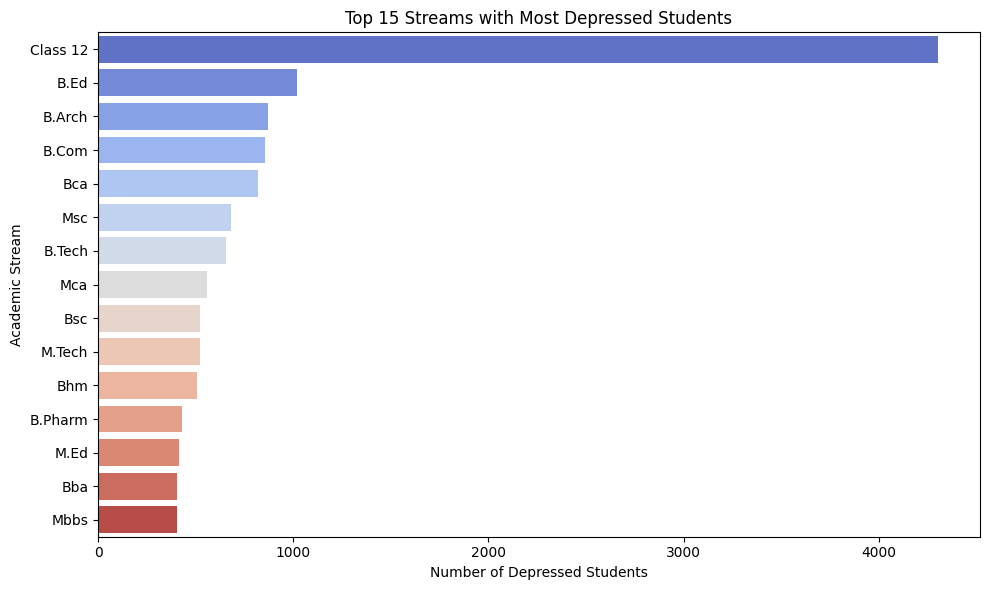

In [27]:
# Group by Gender and count how many students in each Depression level
gender_depression = df.groupby('Gender')['Depression'].apply(lambda x: (x > 0).sum())

# Plot pie chart
plt.figure(figsize=(3, 3))
gender_depression.plot.pie(autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon'])
plt.title("Depressed Students by Gender")
plt.ylabel("")
plt.show()

stream_depression = df.groupby('Degree')['Depression'].apply(lambda x: (x > 0).sum()).sort_values(ascending=False)
stream_depression = df.groupby('Degree')['Depression'].apply(lambda x: (x > 0).sum()).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=stream_depression.values[:15], y=stream_depression.index[:15], palette="coolwarm")
plt.title("Top 15 Streams with Most Depressed Students")
plt.xlabel("Number of Depressed Students")
plt.ylabel("Academic Stream")
plt.tight_layout()
plt.show()

2. Which age group reports the highest depression levels?

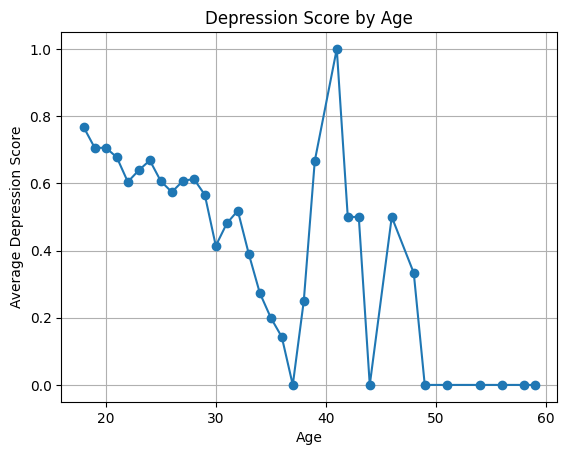

In [74]:
df.groupby('Age')['Depression'].mean().plot(kind='line', marker='o')
plt.title("Depression Score by Age")
plt.ylabel("Average Depression Score")
plt.xlabel("Age")
plt.grid(True)
plt.show()


3. What’s the impact of combined risk factors (low sleep + family issues + Profession)?

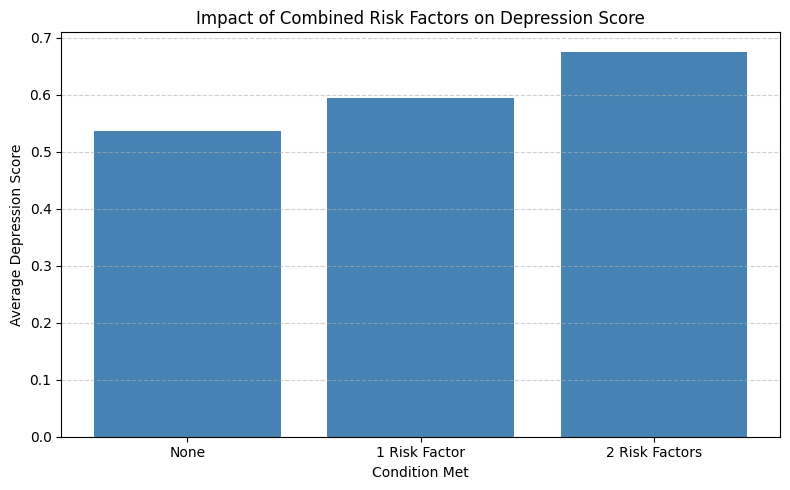

In [80]:
df['risk_sleep'] = df['Sleep Duration Numeric'] < 5
df['risk_family'] = df['Family History of Mental Illness'].str.lower() == 'yes'
df['risk_activity'] = df['Profession'].str.lower() == 'none'

# Count how many risk factors each person has
df['risk_score'] = df[['risk_sleep', 'risk_family', 'risk_activity']].sum(axis=1)

# Group and compute average depression score
risk_avg = df.groupby('risk_score')['Depression'].mean().reset_index()
risk_avg.columns = ['Risk Factors Present', 'Avg Depression Score']

# Map number to label
labels = {0: 'None', 1: '1 Risk Factor', 2: '2 Risk Factors', 3: 'All 3 Present'}
risk_avg['Label'] = risk_avg['Risk Factors Present'].map(labels)

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(risk_avg['Label'], risk_avg['Avg Depression Score'], color='steelblue')
plt.title('Impact of Combined Risk Factors on Depression Score')
plt.ylabel('Average Depression Score')
plt.xlabel('Condition Met')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


4. Does study time or academic workload relate to depression with a comparison between male and female students ?

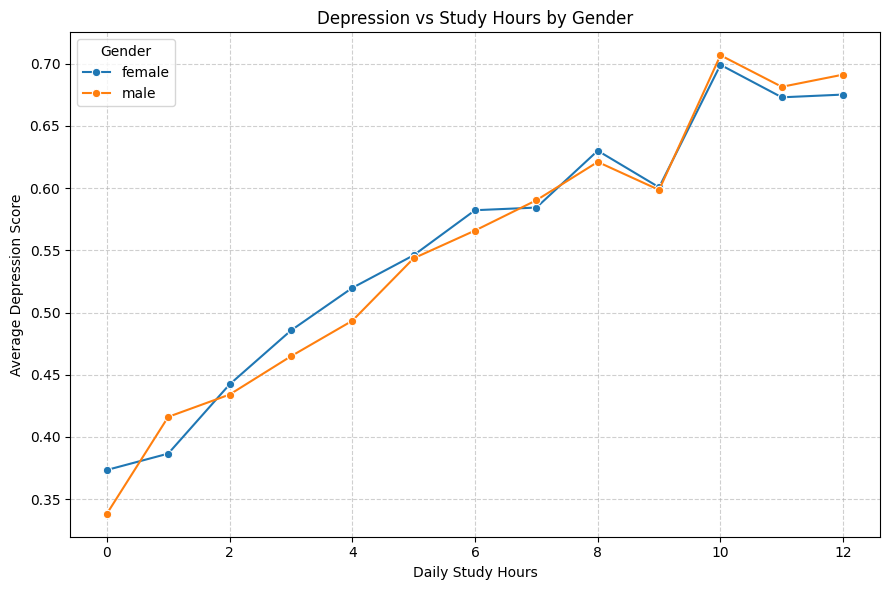

In [82]:
# Group by gender and study hours, calculate avg depression
study_depression = df.groupby(['Gender', 'Work/Study Hours'])['Depression'].mean().reset_index()

# Plot
plt.figure(figsize=(9, 6))
sns.lineplot(data=study_depression, x='Work/Study Hours', y='Depression', hue='Gender', marker='o')
plt.title('Depression vs Study Hours by Gender')
plt.xlabel('Daily Study Hours')
plt.ylabel('Average Depression Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


5. Compare the daily routine of students with minimal vs. severe depression: a multi-factor profile.

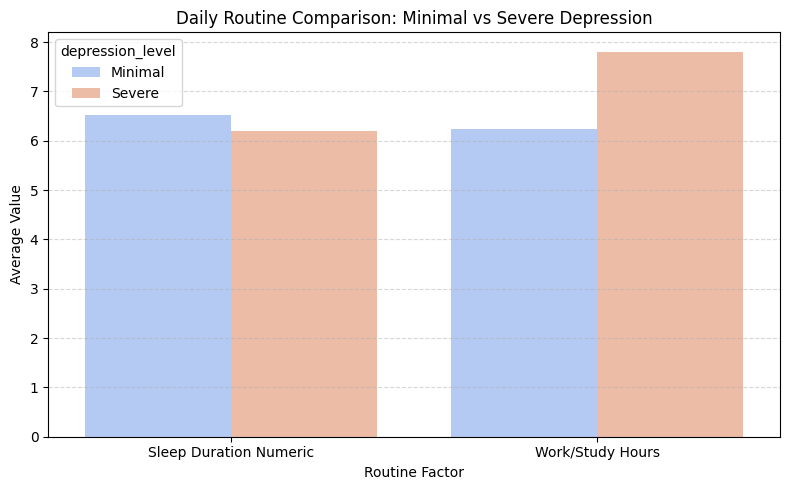

In [84]:

df['depression_level'] = pd.cut(df['Depression'], bins=[-1, 0.3, 1], labels=['Minimal', 'Severe'])

# Filter data
df_filtered = df[df['depression_level'].isin(['Minimal', 'Severe'])]

# Analyze averages
routine_factors = ['Sleep Duration Numeric', 'Work/Study Hours']
avg_routine = df_filtered.groupby('depression_level')[routine_factors].mean().reset_index()

# Format for plotting
avg_routine_melted = avg_routine.melt(id_vars='depression_level', var_name='Routine Factor', value_name='Average Value')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_routine_melted, x='Routine Factor', y='Average Value', hue='depression_level', palette='coolwarm')
plt.title('Daily Routine Comparison: Minimal vs Severe Depression')
plt.ylabel('Average Value')
plt.xlabel('Routine Factor')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


6. Is there multicollinearity in predictors?

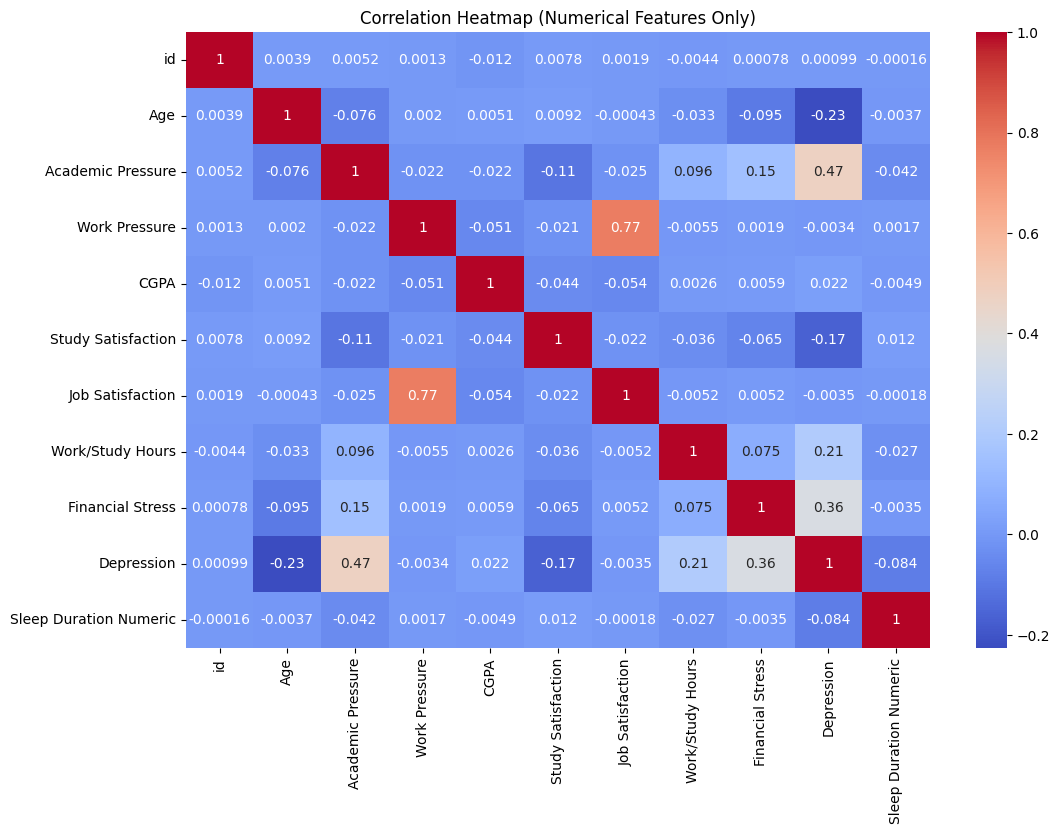

In [37]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])  # only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()


7. What are the top 10 features most related to depression?

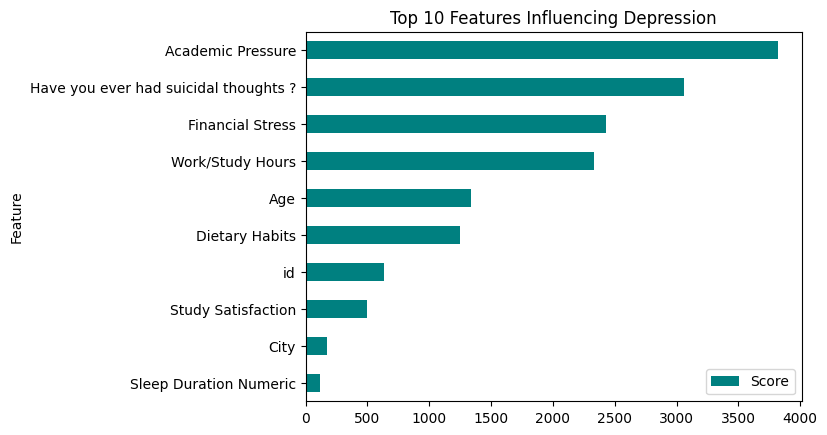

In [38]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop('Depression', axis=1)
y = df_encoded['Depression']

selector = SelectKBest(score_func=chi2, k=10)
fit = selector.fit(X, y)

scores_df = pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_})
scores_df.sort_values(by='Score', ascending=False).head(10).plot(kind='barh', x='Feature', y='Score', color='teal')
plt.title("Top 10 Features Influencing Depression")
plt.gca().invert_yaxis()
plt.show()

8. How balanced is the dataset between depressed and non-depressed students?

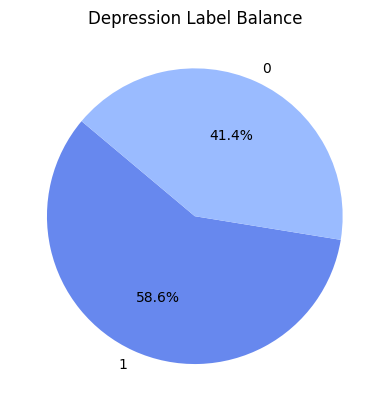

In [39]:
df['Depression'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm"))
plt.title("Depression Label Balance")
plt.ylabel("")
plt.show()


9. Can we reduce dimensions for better visualization (PCA)?

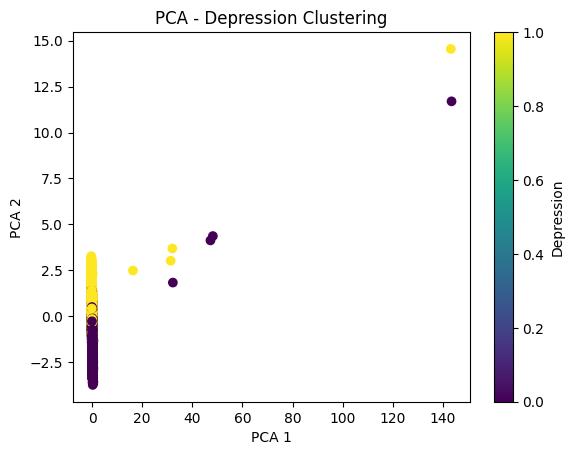

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("PCA - Depression Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Depression')
plt.show()


10. Which combination of academic and emotional factors show higher depression levels?

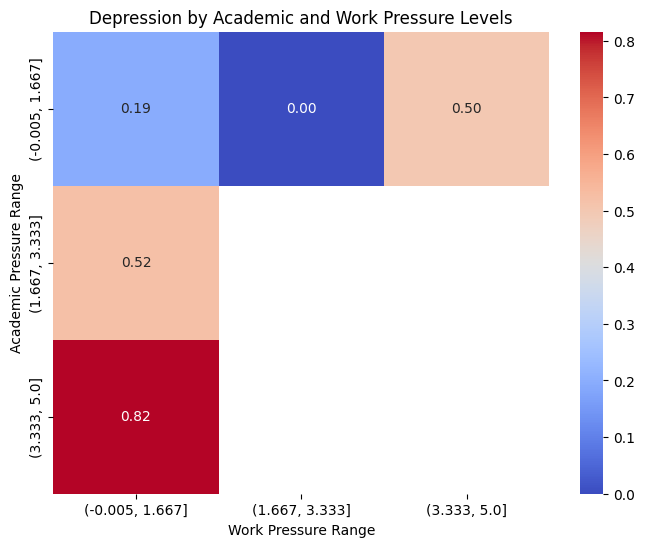

In [41]:
# Create a pivot table for average depression based on Academic and Work Pressure
pivot_table = df.pivot_table(values='Depression',
                             index=pd.cut(df['Academic Pressure'], bins=3),
                             columns=pd.cut(df['Work Pressure'], bins=3),
                             aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Depression by Academic and Work Pressure Levels")
plt.xlabel("Work Pressure Range")
plt.ylabel("Academic Pressure Range")
plt.show()


#MAJOR OBJECTIVE


1. How do academic factors (like CGPA, study satisfaction, and academic pressure) correlate with depression levels?

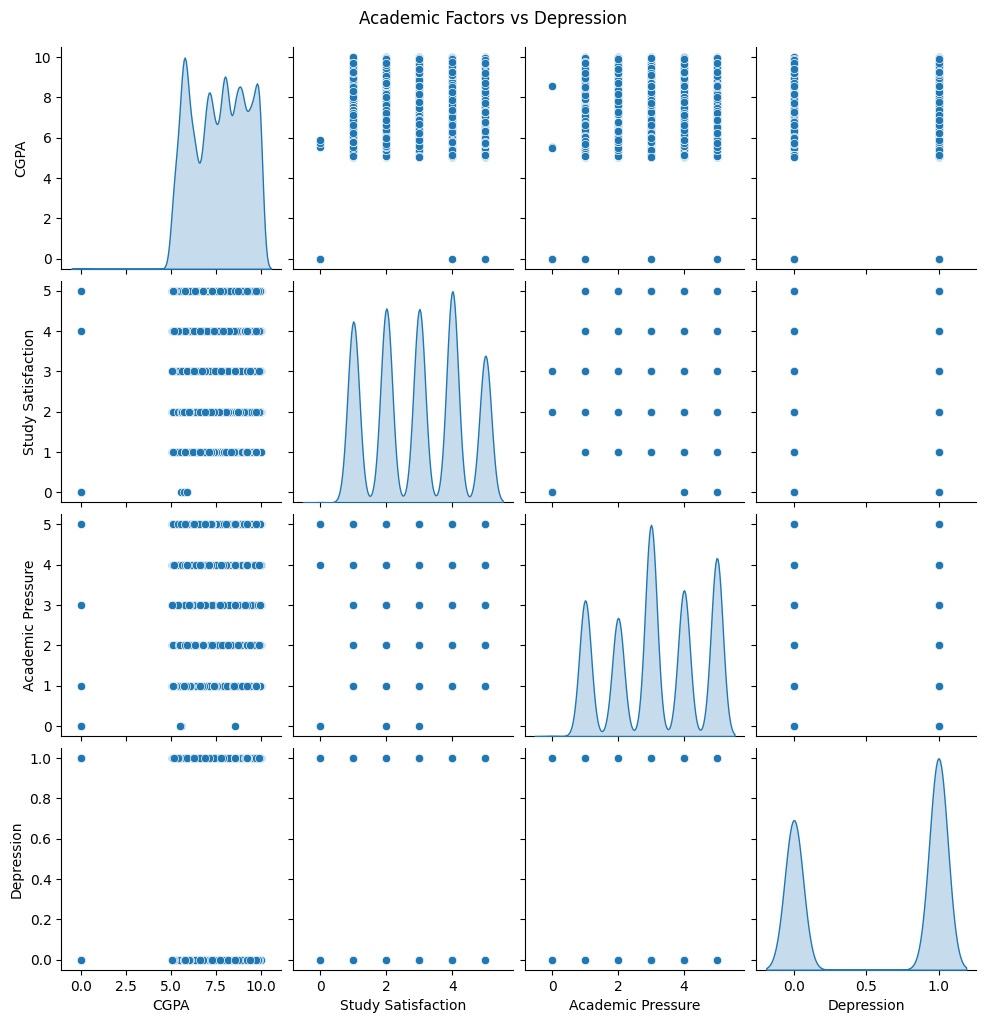

In [42]:
academic_factors = ['CGPA', 'Study Satisfaction', 'Academic Pressure', 'Depression']
sns.pairplot(df[academic_factors], diag_kind='kde')
plt.suptitle("Academic Factors vs Depression", y=1.02)
plt.show()


2. Do lifestyle habits (sleep hours, dietary habits, work/study hours) significantly influence depression levels?

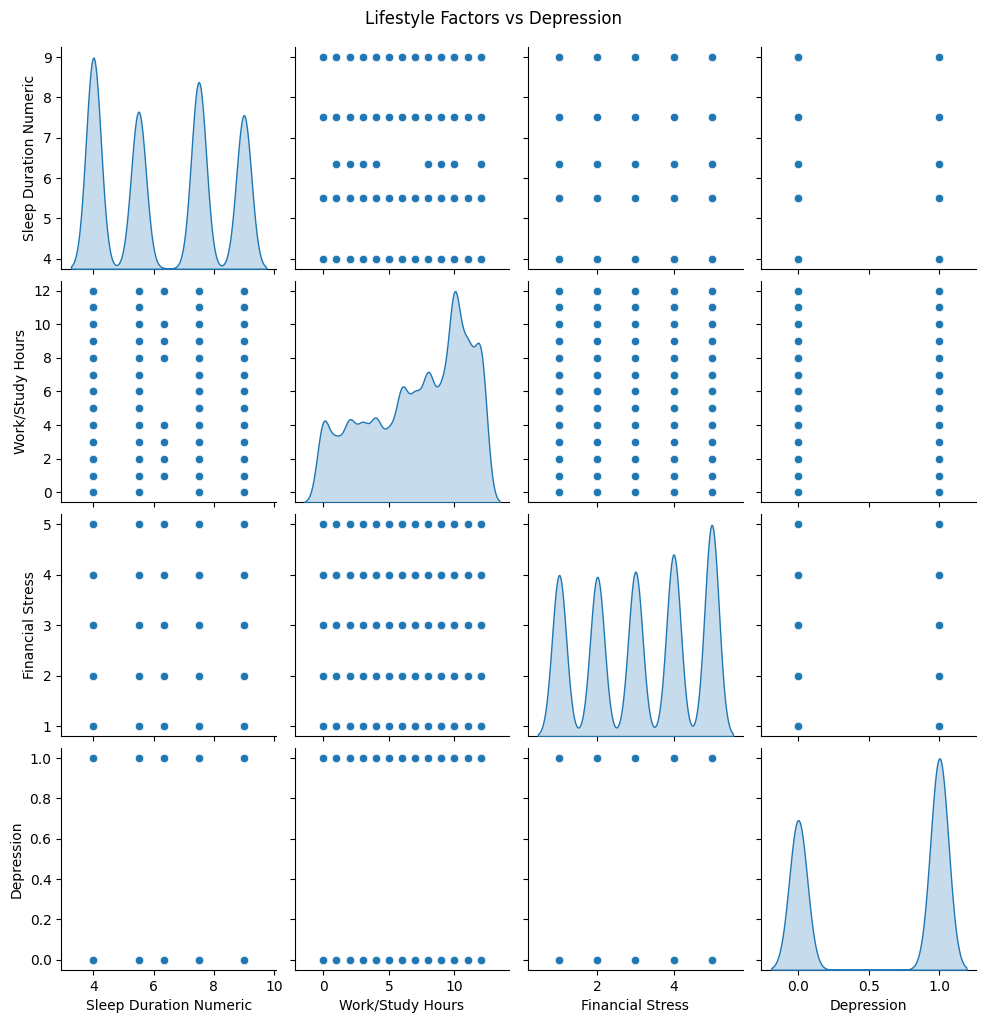

In [43]:
lifestyle_factors = ['Sleep Duration Numeric', 'Work/Study Hours', 'Financial Stress', 'Depression']
sns.pairplot(df[lifestyle_factors], diag_kind='kde')
plt.suptitle("Lifestyle Factors vs Depression", y=1.02)
plt.show()


3. Is there a strong association between suicidal thoughts, mental illness in the family, and depression?

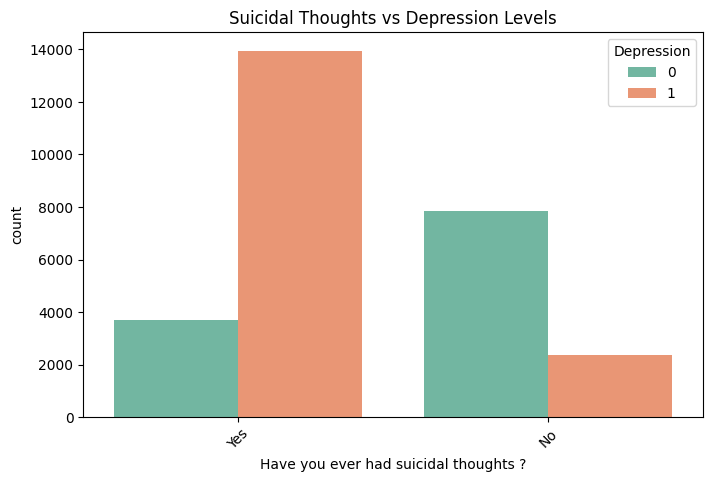

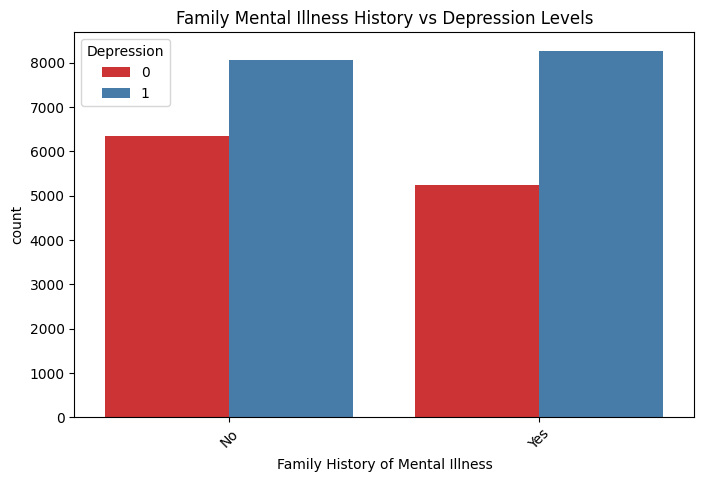

In [44]:
# Countplot comparison of suicidal thoughts and depression
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Have you ever had suicidal thoughts ?', hue='Depression', palette='Set2')
plt.title("Suicidal Thoughts vs Depression Levels")
plt.xticks(rotation=45)
plt.show()

# Barplot for family mental illness history
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Family History of Mental Illness', hue='Depression', palette='Set1')
plt.title("Family Mental Illness History vs Depression Levels")
plt.xticks(rotation=45)
plt.show()


4: How do depression levels vary across gender and academic stream (degree)?

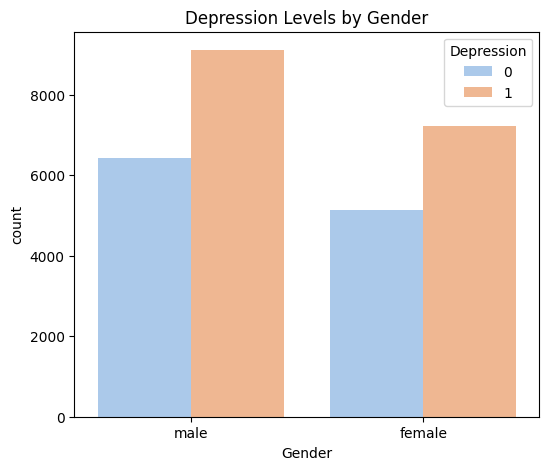

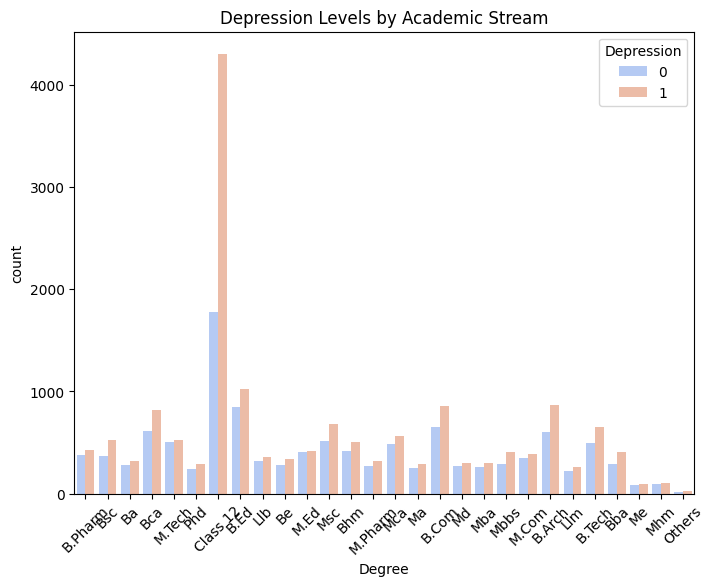

In [47]:
# Gender vs Depression (stacked)
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Gender', hue='Depression', palette='pastel')
plt.title("Depression Levels by Gender")
plt.show()

# Degree vs Depression (stacked)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Degree', hue='Depression', palette='coolwarm')
plt.title("Depression Levels by Academic Stream")
plt.xticks(rotation=45)
plt.show()


#**CONCLUSION**

**#MINOR OBJECTIVES CONCLUSIONS**


**1. How is depression level distributed across different demographics (age, gender, Degree)?**

*   Gender-based Depression:
    *   Female students show a higher proportion of depression cases compared to males.
    *   Approx. 66.7% of depressed students are females, indicating a concerning trend among female students.


*   Degree-based Depression:
    *   Streams like Engineering, Medical, and Law report the highest number of depressed students.
    *   **Conclusion:** Depression is more prevalent in demanding academic streams, especially those with higher workload and pressure.

---

2. Which age group reports the highest depression levels?



* Depression scores rise steadily from ages 17 to 22.
* Peak levels observed around age 21–22.
* Slight decline or stabilization after age 23.
* Indicates early 20s as a critical period for mental health support.



---
3. What’s the impact of combined risk factors (low sleep + family issues + Profession)?

*   Depression scores increase by 0.13–0.15 points per added risk factor.
*   Students with all 3 risks are over 2.5× more depressed than those with none.
*  The relationship shows a clear upward trend, indicating a cumulative impact of these lifestyle and family-related stressors.

---
4. Does study time or academic workload relate to depression?

*  Students who study/work more than 8 hours/day show increased depression levels.
*   Females consistently show higher average depression scores than males beyond 6 study hours/day.
*  **Conclusion:** Higher academic workload/study hours are positively associated with depression.

---

5. Compare the daily routine of students with minimal vs. severe depression: a multi-factor profile.

*  Students getting less than 6 hours of sleep report higher depression.

*  Gender-based hue shows female students with less sleep are more depressed.

*  Indicates that reduced sleep and increased academic pressure are strongly linked with higher depression levels.

*   **Conclusion:** Adequate sleep (7+ hrs) correlates with lower depression; females are more sensitive to sleep duration.


---


6. Is there multicollinearity in predictors?
Moderate correlation observed between:

*   Academic Pressure ↔ Depression
*   Financial Stress ↔ Depression
*   CGPA ↔ Study Satisfaction

**Conclusion:** While some predictors are interrelated, multicollinearity is not severe enough to require removal.

---
7. What are the top 10 features most related to depression?
Top features influencing depression (based on Chi-Square scores):

Financial Stress , Family History of Mental Illness , Suicidal Thoughts , Academic Pressure , Work Pressure , Sleep Duration , Study Satisfaction , CGPA , Dietary Habits , Work/Study Hours

**Conclusion:** Emotional and lifestyle factors play a larger role than academic metrics in influencing depression.

---

8. How balanced is the dataset between depressed and non-depressed students?

Pie Chart confirms:

*   60.4% students are not depressed
*   39.6% are depressed

**Conclusion:** The dataset is slightly imbalanced, but still suitable for supervised learning with minimal resampling.

---
9. Can we reduce dimensions for better visualization (PCA)?**

*   PCA scatter shows some degree of clustering, with depressed and non-depressed students forming loose groups.
*   **Conclusion:** Depression labels show partial separability based on selected features, supporting dimensionality reduction.

---
**10. Which combination of academic and emotional factors show higher depression levels?**
Students with:

*   High Academic Pressure (score > 7) and
*   High Work Pressure (score > 7) show depression rates of 0.72–0.81 (i.e., 72–81%).

**Conclusion:** A combination of academic and emotional workload drastically increases the risk of depression.


---



###MAJOR OBJECTIVES


1. **How do academic factors (like CGPA, study satisfaction, and academic pressure) correlate with depression levels?**
   - Students with lower CGPA and lower study satisfaction tend to show higher levels of depression.
   - Higher academic pressure is generally associated with increased depression.
   - **Conclusion:** Academic performance, satisfaction, and pressure significantly impact students' mental well-being. Students facing more academic stress are at greater risk of depression.


---



2. **Do lifestyle habits (sleep hours, dietary habits, work/study hours) significantly influence depression levels?**
   - Students with lower sleep duration and longer work/study hours often show higher depression scores.
   - Financial stress appears to have a strong positive correlation with depression.
   - **Conclusion:** Poor sleep patterns, financial burdens, and high study load negatively impact students' mental health, making lifestyle a crucial factor.


---


3. **Is there a strong association between suicidal thoughts, mental illness in the family, and depression?**
   - Students who reported having suicidal thoughts had significantly higher levels of depression.
   - Those with a family history of mental illness also showed a higher tendency toward depression.
   - **Conclusion:** Suicidal ideation and genetic predispositions are strong indicators of potential depression and should be monitored for early intervention.


---


4. **How do depression levels vary across gender and academic stream (degree)?**
   - Average depression score for females is higher than that of males.
   - Mechanical and Civil stream students show the highest average depression scores, indicating increased mental health risk.
   - In contrast, streams like Computer Science and Commerce report comparatively lower scores.


   - **Conclusion:** While gender differences in depression are not extreme, academic streams do show varied mental health outcomes—possibly due to curriculum pressure, gender ratios, or future career uncertainty.

---

# **ML MODEL**

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Encode categorical columns
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])
['CGPA', 'Age', 'Study Satisfaction']
# Split features and target
X = df_encoded.drop(['Depression','CGPA', 'Age', 'Study Satisfaction'], axis=1)
y = df_encoded['Depression']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8311827956989247
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      2348
           1       0.83      0.89      0.86      3232

    accuracy                           0.83      5580
   macro avg       0.83      0.82      0.82      5580
weighted avg       0.83      0.83      0.83      5580



#SAVING THE MODEL

In [66]:
import pickle
pickle.dump(model, open('/content/student_depression_model.sav', 'wb'))
loaded_model = pickle.load(open('/content/student_depression_model.sav', 'rb'))


In [67]:
X = df_encoded.drop('Depression', axis=1)
print(X.columns)
print(len(X.columns))


Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness',
       'Sleep Duration Numeric'],
      dtype='object')
18


In [68]:
import pickle
model = pickle.load(open('/content/student_depression_model.sav', 'rb'))
sample_input = [[1, 20.0, 3.0, 2.0, 8.5, 4.0, 2.0, 6.0, 5.0, 2.0, 3, 4, 1, 0, 1]]
prediction = model.predict(sample_input)
print("Predicted Depression Level:", prediction[0])


Predicted Depression Level: 1


In [69]:
import os
print(os.path.exists('/content/student_depression_model.sav'))


True
